In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

## 주요절차

### 1. 초기데이터 분석

In [2]:
file1 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202301.csv',encoding='cp949')
file2 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202302.csv',encoding='cp949')
file3 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202303.csv',encoding='cp949')
file4 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202304.csv',encoding='cp949')
file5 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202305.csv',encoding='cp949')
file6 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202306.csv',encoding='cp949')
file7 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202307.csv',encoding='cp949')
file8 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202308.csv',encoding='cp949')
file9 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202309.csv',encoding='cp949')
file10 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202310.csv',encoding='cp949')
file11 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202311.csv',encoding='cp949')
file12 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202312.csv',encoding='cp949')

result = pd.concat([file1,file2,file3,file4,file5,file6,file7,file8,file9,file10,file11,file12])
result.head()

,기준년도,기준월,법정동코드,법정동명,표준산업대분류코드,표준산업대분류명,1인당 소비 금액
0,2023,1,30200126,가정동,C,제조업(10-34),33800
1,2023,1,30200126,가정동,G,도매 및 소매업(45-47),40200
2,2023,1,30200126,가정동,I,숙박 및 음식점업(55-56),21300
3,2023,1,30200126,가정동,P,교육 서비스업(85),74400
4,2023,1,30200126,가정동,Q,보건업 및 사회복지 서비스업(86-87),17800


#### 1-1. 데이터딕셔너리(각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼) 확인
#### 1-2 데이터 기초정보 확인 (사이즈, 열이름, 데이터형)

In [3]:
result.표준산업대분류명.value_counts()

표준산업대분류명
숙박 및 음식점업(55-56)                   605
도매 및 소매업(45-47)                    580
협회 및 단체  수리 및 기타 개인 서비스업(94-96)    552
교육 서비스업(85)                        550
예술  스포츠 및 여가관련 서비스업(90-91)         447
보건업 및 사회복지 서비스업(86-87)             404
공공 행정 국방 및 사회보장 행정(84)             358
전문  과학 및 기술 서비스업(70-73)            353
제조업(10-34)                         336
운수 및 창고업(49-52)                    287
건설업(41-42)                         170
사업시설 관리  사업 지원 및 임대 서비스업(74-76)    151
금융 및 보험업(64~66)                    107
부동산업(68)                            56
정보통신업(58-63)                        51
금융 및 보험업(64-66)                      7
Name: count, dtype: int64

In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5014 entries, 0 to 446
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기준년도       5014 non-null   int64 
 1   기준월        5014 non-null   int64 
 2   법정동코드      5014 non-null   int64 
 3   법정동명       5014 non-null   object
 4   표준산업대분류코드  5014 non-null   object
 5   표준산업대분류명   5014 non-null   object
 6   1인당 소비 금액  5014 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 313.4+ KB


* 기초통계정보 확인

### 2. 데이터 정제

In [5]:
use_cols = ["기준월", "법정동명", "표준산업대분류명", "1인당 소비 금액"]
df = result[use_cols].copy()
df

,기준월,법정동명,표준산업대분류명,1인당 소비 금액
0,1,가정동,제조업(10-34),33800
1,1,가정동,도매 및 소매업(45-47),40200
2,1,가정동,숙박 및 음식점업(55-56),21300
3,1,가정동,교육 서비스업(85),74400
4,1,가정동,보건업 및 사회복지 서비스업(86-87),17800
...,...,...,...,...
442,12,화암동,숙박 및 음식점업(55-56),26900
443,12,화암동,공공 행정 국방 및 사회보장 행정(84),40800
444,12,화암동,교육 서비스업(85),445800
445,12,화암동,보건업 및 사회복지 서비스업(86-87),575500


In [6]:
def simplify_category(x):
    if x in ["제조업(10-34)", "건설업(41-42)"]:
        return "제조·건설업"
    elif x in ["숙박 및 음식점업(55-56)"]:
        return "숙박·음식업"
    elif x in ["도매 및 소매업(45-47)"]:
        return "도매·소매업"
    elif x in ["운수 및 창고업(49-52)"]:
        return "운수·창고업"
    elif x in ["금융 및 보험업(64-66)", "부동산업(68)"]:
        return "금융·부동산"
    elif x in ["교육 서비스업(85)", "보건업 및 사회복지 서비스업(86-87)", "공공 행정 국방 및 사회보장 행정(84)"]:
        return "공공·교육·보건"
    elif x in ["예술  스포츠 및 여가관련 서비스업(90-91)", "협회 및 단체  수리 및 기타 개인 서비스업(94-96)"]:
        return "예술·여가·개인서비스"
    else:
        return "기타"

df["산업분류"] = df["표준산업대분류명"].apply(simplify_category)
df

,기준월,법정동명,표준산업대분류명,1인당 소비 금액,산업분류
0,1,가정동,제조업(10-34),33800,제조·건설업
1,1,가정동,도매 및 소매업(45-47),40200,도매·소매업
2,1,가정동,숙박 및 음식점업(55-56),21300,숙박·음식업
3,1,가정동,교육 서비스업(85),74400,공공·교육·보건
4,1,가정동,보건업 및 사회복지 서비스업(86-87),17800,공공·교육·보건
...,...,...,...,...,...
442,12,화암동,숙박 및 음식점업(55-56),26900,숙박·음식업
443,12,화암동,공공 행정 국방 및 사회보장 행정(84),40800,공공·교육·보건
444,12,화암동,교육 서비스업(85),445800,공공·교육·보건
445,12,화암동,보건업 및 사회복지 서비스업(86-87),575500,공공·교육·보건


In [7]:
df.산업분류.value_counts()

산업분류
공공·교육·보건       1312
예술·여가·개인서비스     999
기타              662
숙박·음식업          605
도매·소매업          580
제조·건설업          506
운수·창고업          287
금융·부동산           63
Name: count, dtype: int64

In [8]:
df

,기준월,법정동명,표준산업대분류명,1인당 소비 금액,산업분류
0,1,가정동,제조업(10-34),33800,제조·건설업
1,1,가정동,도매 및 소매업(45-47),40200,도매·소매업
2,1,가정동,숙박 및 음식점업(55-56),21300,숙박·음식업
3,1,가정동,교육 서비스업(85),74400,공공·교육·보건
4,1,가정동,보건업 및 사회복지 서비스업(86-87),17800,공공·교육·보건
...,...,...,...,...,...
442,12,화암동,숙박 및 음식점업(55-56),26900,숙박·음식업
443,12,화암동,공공 행정 국방 및 사회보장 행정(84),40800,공공·교육·보건
444,12,화암동,교육 서비스업(85),445800,공공·교육·보건
445,12,화암동,보건업 및 사회복지 서비스업(86-87),575500,공공·교육·보건


In [9]:
def group_region(dong):
    if dong in ["지족동","노은동","반석동","죽동","외삼동","송강동","하기동","갑동"]:
        return "노은권역"
    elif dong in ["원신흥동","상대동","원내동","복용동","계산동","신성동","성북동"]:
        return "원신흥·상대권역"
    elif dong in ["궁동","어은동","봉명동","장대동","구암동","도룡동"]:
        return "궁동·어은권역"
    elif dong in ["전민동","관평동","탑립동","용산동","문지동","신봉동","자운동"]:
        return "전민·관평권역"
    elif dong in ["학하동","원촌동","대정동","덕명동","교촌동","수남동","추목동","가정동"]:
        return "진잠·학하권역"
    else:
        return "외곽권역"

df["권역"] = df["법정동명"].apply(group_region)

In [10]:
df

,기준월,법정동명,표준산업대분류명,1인당 소비 금액,산업분류,권역
0,1,가정동,제조업(10-34),33800,제조·건설업,진잠·학하권역
1,1,가정동,도매 및 소매업(45-47),40200,도매·소매업,진잠·학하권역
2,1,가정동,숙박 및 음식점업(55-56),21300,숙박·음식업,진잠·학하권역
3,1,가정동,교육 서비스업(85),74400,공공·교육·보건,진잠·학하권역
4,1,가정동,보건업 및 사회복지 서비스업(86-87),17800,공공·교육·보건,진잠·학하권역
...,...,...,...,...,...,...
442,12,화암동,숙박 및 음식점업(55-56),26900,숙박·음식업,외곽권역
443,12,화암동,공공 행정 국방 및 사회보장 행정(84),40800,공공·교육·보건,외곽권역
444,12,화암동,교육 서비스업(85),445800,공공·교육·보건,외곽권역
445,12,화암동,보건업 및 사회복지 서비스업(86-87),575500,공공·교육·보건,외곽권역


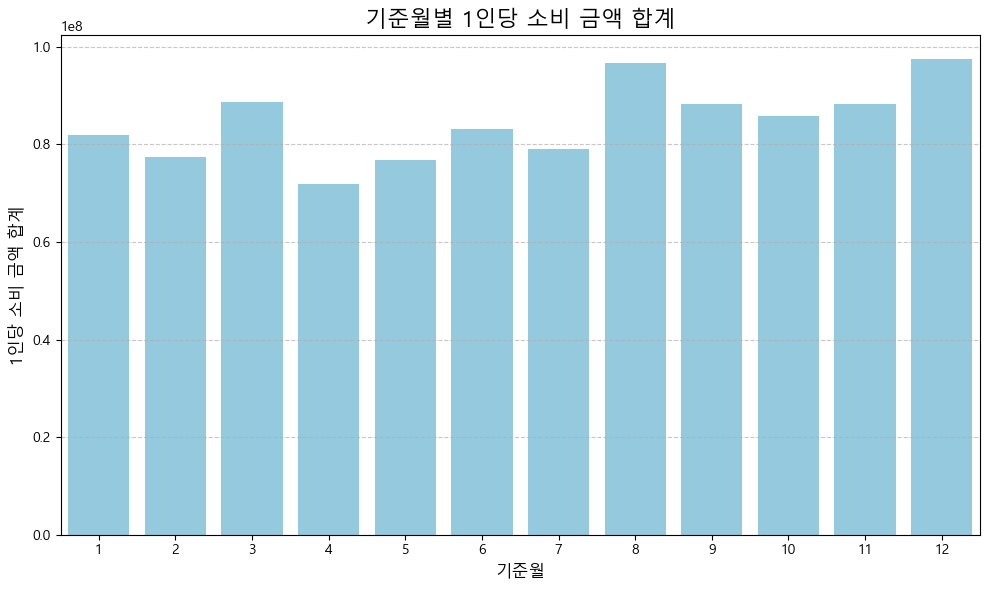

In [11]:
df_group1 = df.groupby("기준월")["1인당 소비 금액"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="기준월", y="1인당 소비 금액", data=df_group1, color='skyblue')

plt.title('기준월별 1인당 소비 금액 합계', fontsize=16)
plt.xlabel('기준월', fontsize=12)
plt.ylabel('1인당 소비 금액 합계', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks()  
plt.tight_layout()
plt.show()

- 연초에 비해 연말이 1인당 소비 금액 합계가 살짝 늘어나는 경향이 있다.

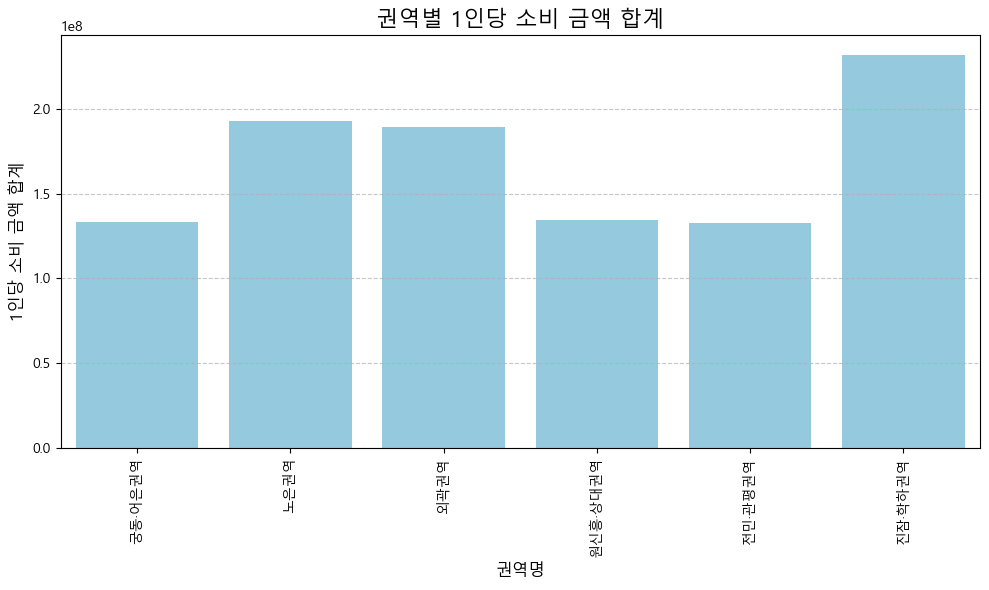

In [12]:
df_group1 = df.groupby("권역")["1인당 소비 금액"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="권역", y="1인당 소비 금액", data=df_group1, color='skyblue')

plt.title('권역별 1인당 소비 금액 합계', fontsize=16)
plt.xlabel('권역명', fontsize=12)
plt.ylabel('1인당 소비 금액 합계', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

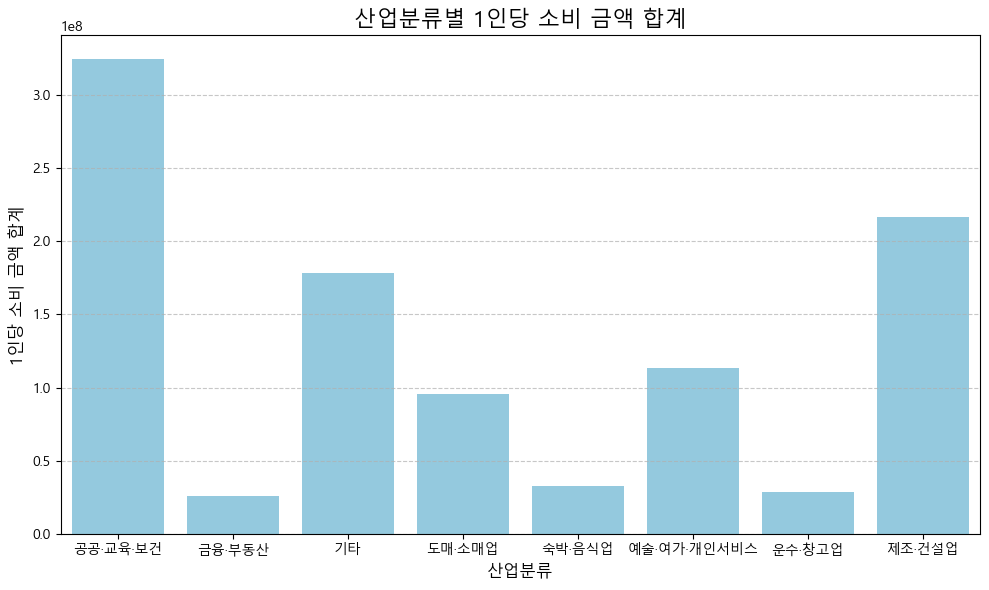

In [13]:
df_group1 = df.groupby("산업분류")["1인당 소비 금액"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="산업분류", y="1인당 소비 금액", data=df_group1, color='skyblue')

plt.title('산업분류별 1인당 소비 금액 합계', fontsize=16)
plt.xlabel('산업분류', fontsize=12)
plt.ylabel('1인당 소비 금액 합계', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks()  
plt.tight_layout()
plt.show()

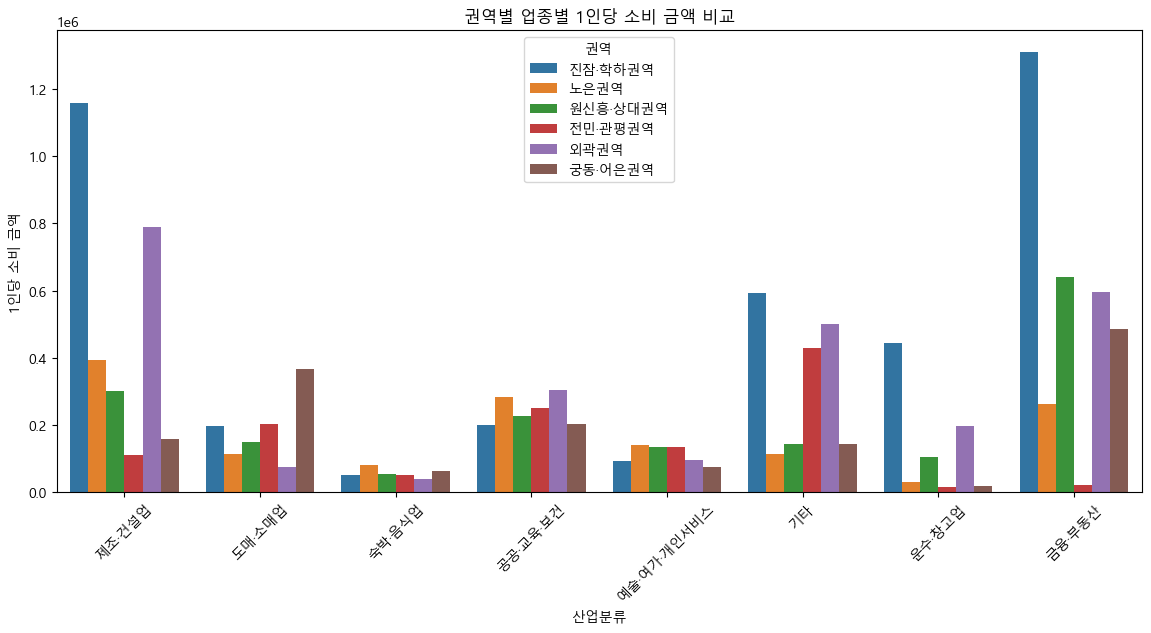

In [14]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=df,
    x="산업분류", 
    y="1인당 소비 금액", 
    hue="권역", 
    errorbar=None
)
plt.title("권역별 업종별 1인당 소비 금액 비교")
plt.xticks(rotation=45)
plt.ylabel("1인당 소비 금액")
plt.xlabel("산업분류")
plt.legend(title="권역")
plt.show()

### 권역별

__진장·학하__: 전반적 상위 + 금융·부동산/제조·건설/운수창고업 초강세 → 직장·산업/거래 중심 권역.

    * 아이템/입점: B2B 중심 업종(건설·제조 자재, 산업안전, 법인차량/정비, 회계·자문, 기업대출 창구), 프리미엄 런치 타깃 등

__궁동·어은__: 도매·소매 강세, 나머지는 보수적 → 주거·학생·생활소비형 상권 느낌.

    * 아이템/입점: 편의·패션·IT수리·저가 QSR·카페·문구/학습·헬스/PT 소형, 구독형 세탁/정기배송.

__외곽__: 제조·건설, 금융·부동산, 기타가 상위 → 개발·거래·서비스 혼합형.

    * 아이템/입점: 인테리어·이사·차량서비스, 대형 창고형 리테일

__전민·관평__: ‘기타’와 도매·소매, 예술·여가가 상대적 강점 → 서비스·생활편의 중심.

    * 아이템/입점: 피트니스·필라테스, 뷰티·메디컬·웨딩, 가족 외식, 키즈카페·액티비티.

__노은 / 원신흥·상대__: 특정 업종(금융·부동산, 공공·교육군) 외엔 중간권 → 균형형 주거지.

    * 아이템/입점: 기본 의료·치과, 학원·돌봄, 금융 창구(적금·보험), 생활밀착형 서비스.

### 업종별

__금융·부동산__: 전체 소비금액 1위(비중 약 25~30%), 진잠·학하권역, 외곽권역에서 기업 중심 거래 비중 높음
    
    * 아이템/입점: B2B 중심 금융 서비스: 기업대출, 법인 자산 관리, 세무·회계 서비스, 프리미엄 창구 확대: 고소득 주거지 타깃 투자·보험 컨설팅, 부동산 연계 서비스: 상업용 부동산, 창고형 시설, 개발형 토지 거래 특화
    
__제조·건설업__: 진잠·학하권역 중심 소비금액 권역 대비 2배 이상, 건설사·산업단지와 밀접한 B2B 소비 구조
    
    * 아이템/입점: 산업안전·설비 자재 공급망 확대, 대형 창고·물류 거점 유치, 산업 전문 서비스 강화: 법인차량 정비, 기업형 식자재·자재 유통
    
__도매·소매업__: 전체 소비금액 2\~3위권, 권역별로 분산되어 있지만 궁동·어은권역 강세, 학생, 젊은 직장인, 1\~2인 가구 중심의 생활소비 패턴
    
    * 아이템/입점: 소형 리테일 및 편의점 확대, 구독형 서비스: 정기배송, 세탁, 구독형 간편식, 체험형 매장 강화: IT·패션·홈카페, 라이프스타일 전문 스토어
    
__숙박·음식업__: 전체 산업 중 소비금액 최저(비중 약 8~10%), 관광객·학생 중심의 한정적 수요 구조

    * 아이템/입점: 학생·직장인 중심 F&B 브랜드 강화: 저가 QSR, 1인 식사, 테이크아웃 특화, 프리미엄 런치 및 주말 특화 매장 확대, 관광객 타깃 숙박/레저 패키지 제안
    
__공공·교육 서비스업__: 노은·원신흥·상대권역 중심 소비 집중, 주거지 밀집 및 학원·교육 기반 상권에서 높은 소비 패턴
    
    * 아이템/입점: 학원·돌봄 인프라 확대: 키즈 케어센터, 초·중등 학습 서비스, 공공 연계형 소비 서비스: 도서관·문화센터와 연계한 프로그램 운영, 생활 밀착형 금융·보험 서비스 강화
__예술·여가 및 개인서비스__: 전민·관평권역에서 소비 비중 높음, 가족 단위, 체험형 여가, 뷰티/헬스 수요 증가
    
    * 아이템/입점: 피트니스·필라테스·PT 스튜디오 중심 신규 상권 확대, 뷰티·메디컬·웨딩 특화존 구축, 키즈·가족 단위 체험형 액티비티 강화

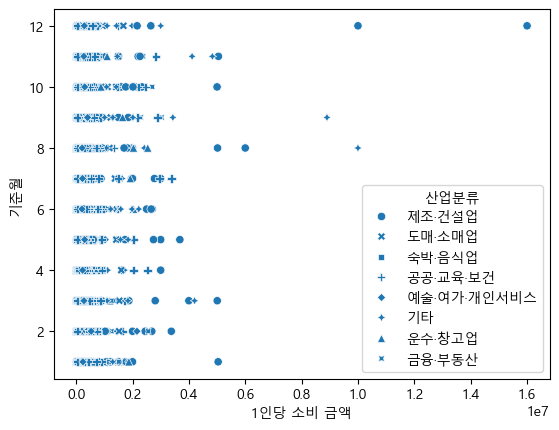

In [15]:
sns.scatterplot(data=df, x='1인당 소비 금액', y='기준월',style='산업분류')
plt.show()

- 연말에 1년 예산을 사용하기 위해 제조.건설업에 큰 금액을 소비하는 것으로 예상할 수 있다.

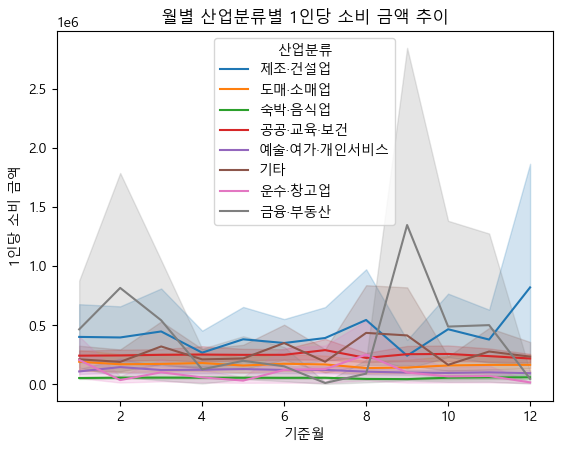

In [16]:
sns.lineplot(data=df, x="기준월", y="1인당 소비 금액", hue="산업분류")
plt.title("월별 산업분류별 1인당 소비 금액 추이")
plt.show()

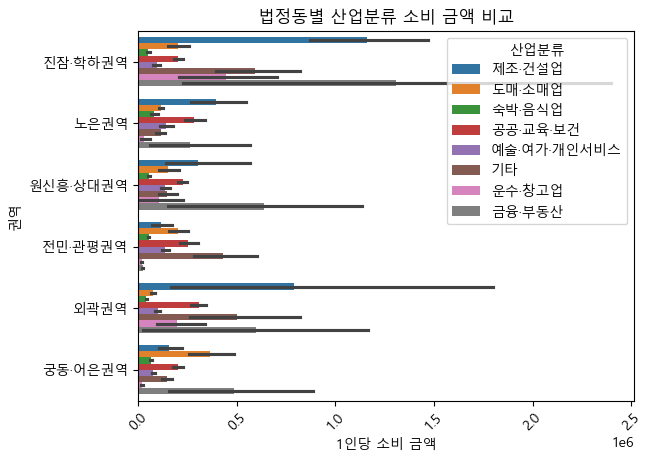

In [17]:
sns.barplot(data=df, x="1인당 소비 금액", y="권역", hue="산업분류")
plt.title("법정동별 산업분류 소비 금액 비교")
plt.xticks(rotation=45)
plt.show()


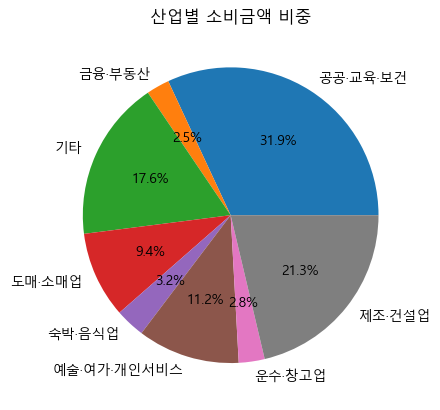

In [18]:
df_group = df.groupby("산업분류")["1인당 소비 금액"].sum()
df_group.plot(kind="pie", autopct="%.1f%%")
plt.title("산업별 소비금액 비중")
plt.ylabel("")
plt.show()


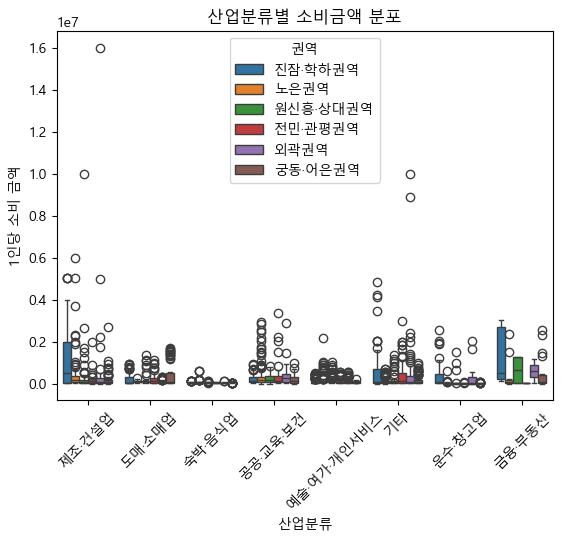

In [19]:
sns.boxplot(data=df, x="산업분류", y="1인당 소비 금액", hue='권역')
plt.xticks(rotation=45)
plt.title("산업분류별 소비금액 분포")
plt.show()

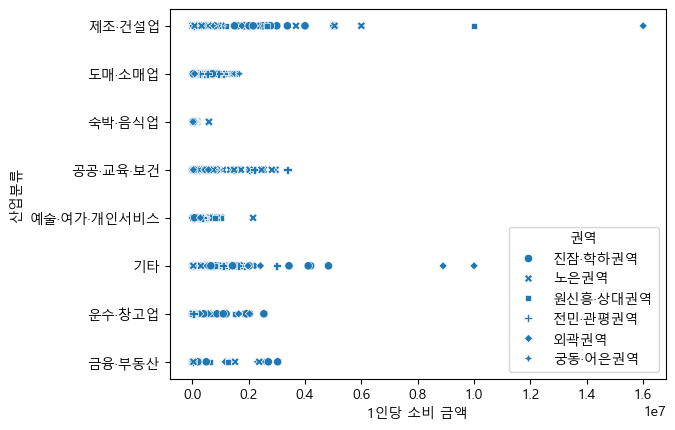

In [20]:
sns.scatterplot(data=df, x='1인당 소비 금액', y='산업분류',style='권역')
plt.show()

#### 2.1. 원본데이터에서 분석가능한 형태로 데이터 전처리 (형변환, 열이름 변경등)
#### 2.2. 데이터 클리닝: 이상치, 결측치처리

### 3. 추가데이터 분석

#### 3.1 데이터 정제후 데이터딕셔너리 재확인
#### 3.2 기초통계 정보 확인 (최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등)
#### 3.3 시각화를 통한 데이터이해 심화 

* 3.3.1 단일 열: 데이터의 성격에 따른 다양한 차트 적용  
* 3.3.2 복수 열: 두개의 열간 연관관계 분석(Pair Plot 또는 Seaborn의 관련 지원 차트등)

#### 3.4 데이터 분석 결과도출

# 데이터분석 적용 실습 템플릿

## 데이터 수집

In [21]:
# 데이터 소스를 확보하세요


## 1. 초기데이터 분석

### 1-1. 데이터스키마 확인

#### 각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼을 확인 가능시 진행 하세요
* A열: A열의 의미를 기술
* B열: B열의 의미를 기술  
...

### 1-2. 데이터 기초정보 확인

* 사이즈, 데이터형, 기초통계항목등을 확인하세요  

In [22]:
#df.shape
#df.info()

* 기초통계항목

In [23]:
# df.desribe()

## 2. 데이터 정제

### 2-1. 간단한 데이터 전처리

In [24]:
# 원본데이터로에서 읽기 가능한 형태로 데이터처리를 하세요. (열이름 변경, 형변환 등)

### 2-2. 데이터 클리닝

In [25]:
# 결측치, 중복값, 이상치 처리등의 작업을 진행하세요

* 결측치

    - 결측치 열 확인

In [26]:
# missing_values = df.isnull().any()  
# column_missing_values = missing_values[ missing_values == True ]
# column_missing_values

In [27]:
# df.isnull().any(axis=1)

* 결측치 보정

In [28]:
# df['나이'] = df['나이'].fillna(0)

In [29]:
# df = df.fillna(0)

* 중복값 삭제 (필요시)

In [30]:
# df[df.duplicated(keep=False)]

In [31]:
# df.drop_duplicates(inplace=True)

## 3. 추가데이터 분석

### 3.1. 데이터 정제후 데이터스키마 재확인

* 1-2 작업을 다시 해보세요.

### 3.2 데이터 기초정보 정보 확인

* 최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값, 결측치, 이상치 등의 정보를 재확인해 보세요

### 3.3 시각화를 통한 데이터이해 심화

* 데이터의 성격에 따라 이해도를 올리기 위해 시각화가 필요한 데이터차트를 만들어 보세요.  
    * (Seaborn 추천: 페어플롯, 막대차트, 파이차트, 라인차트, 히스토그램등..)
    * 차트 분석시 hue인자를 활용해서 범주형 열에 대한 추가 분석을 해보세요.
* 시각화한 차트에 대한 분석

### 3.4 최종 데이터 분석 결과도출

* 데이터 분석을 통해 얻은 새로운 지식, 인사이트를 정리하세요.
* 새로운 지식 및 인사이트 별 비지니스 전략을 도출할 수 있으면 정리해 보세요